## Part 1

### Q1)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_unemployment_rate"

# Send an HTTP request to the webpage
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find the specific table by class or other identifiers
table = soup.find('table', {'class': 'wikitable'})

# Extract the table rows
rows = table.find_all('tr')

# Initialize an empty list to store the data
data = []

# Loop through the rows and extract columns
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    if cols:  # Only add rows that have data
        data.append(cols)

# Convert the data into a Pandas DataFrame
columns = ['State', 'Unemployment Rate (%)']
df = pd.DataFrame(data, columns=columns)

# Clean up the unemployment rate column (convert to numeric)
df['Unemployment Rate (%)'] = pd.to_numeric(df['Unemployment Rate (%)'], errors='coerce')

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file
#df.to_csv("unemployment_data.csv", index=False)

                State  Unemployment Rate (%)
0      Andhra Pradesh                   4.80
1   Arunachal Pradesh                  18.30
2               Assam                    NaN
3               Bihar                  11.40
4        Chhattisgarh                  10.10
5               Delhi                   9.60
6                 Goa                  10.90
7             Gujarat                   3.90
8             Haryana                  22.90
9    Himachal Pradesh                   9.20
10  Jammu and Kashmir                  23.20
11          Jharkhand                  12.20
12          Karnataka                  10.65
13             Kerala                   5.80
14     Madhya Pradesh                   0.90
15        Maharashtra                   4.30
16          Meghalaya                  12.30
17            Mizoram                    NaN
18           Nagaland                    NaN
19             Odisha                  15.90
20         Puducherry                   7.30
21        

In [ ]:
df.loc[df["State"] == "Assam", "Unemployment Rate (%)"] = 10.4
df


,State,Unemployment Rate (%)
0,Andhra Pradesh,4.80
1,Arunachal Pradesh,18.30
2,Assam,10.40
3,Bihar,11.40
4,Chhattisgarh,10.10
5,Delhi,9.60
6,Goa,10.90
7,Gujarat,3.90
8,Haryana,22.90
9,Himachal Pradesh,9.20


### Q2)

In [ ]:
url = "https://en.wikipedia.org/wiki/States_and_union_territories_of_India"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable sortable plainrowheaders'})


In [ ]:
df2 = pd.read_html(str(table))[0]

<ipython-input-24-c959fa371462>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(table))[0]


In [ ]:
df2

,State,ISO,Vehicle code,Zone,Capital,Largest city,Statehood,Population (2011)[27][28],Area (km2),Official languages[29],Additional official languages[29]
0,Andhra Pradesh,IN-AP,AP,Southern,Amaravati,Visakhapatnam,1 November 1956,49506799,162975,Telugu,Urdu[30]
1,Arunachal Pradesh,IN-AR,AR,North-Eastern,Itanagar,Itanagar,20 February 1987,1383727,83743,English,—
2,Assam,IN-AS,AS,North-Eastern,Dispur,Guwahati,26 January 1950,31205576,78438,"Assamese, Boro","Bengali, Meitei[31]"
3,Bihar,IN-BR,BR,Eastern,Patna,Patna,26 January 1950,104099452,94163,Hindi,Urdu
4,Chhattisgarh,IN-CG,CG,Central,Raipur[b],Raipur[b],1 November 2000,25545198,135194,Hindi,Chhattisgarhi
5,Goa,IN-GA,GA,Western,Panaji,Vasco da Gama,30 May 1987,1458545,3702,Konkani,Marathi
6,Gujarat,IN-GJ,GJ,Western,Gandhinagar,Ahmedabad,1 May 1960,60439692,196024,"Gujarati, Hindi",—
7,Haryana,IN-HR,HR,Northern,Chandigarh,Faridabad,1 November 1966,25351462,44212,Hindi,Punjabi[32]
8,Himachal Pradesh,IN-HP,HP,Northern,Shimla (Summer) Dharamshala (Winter)[33],Shimla,25 January 1971,6864602,55673,Hindi,Sanskrit[34]
9,Jharkhand,IN-JH,JH,Eastern,Ranchi,Jamshedpur,15 November 2000,32988134,79714,Hindi,"Angika, Bengali, Bhojpuri, Bhumij, Ho, Kharia,..."


In [ ]:
states_zones = df2.filter(items = ['State', 'Zone'])
states_zones

,State,Zone
0,Andhra Pradesh,Southern
1,Arunachal Pradesh,North-Eastern
2,Assam,North-Eastern
3,Bihar,Eastern
4,Chhattisgarh,Central
5,Goa,Western
6,Gujarat,Western
7,Haryana,Northern
8,Himachal Pradesh,Northern
9,Jharkhand,Eastern


In [ ]:
merged_df = pd.merge(df, states_zones, on='State', how='outer')
merged_df

,State,Unemployment Rate (%),Zone
0,Andhra Pradesh,4.80,Southern
1,Arunachal Pradesh,18.30,North-Eastern
2,Assam,10.40,North-Eastern
3,Bihar,11.40,Eastern
4,Chhattisgarh,10.10,Central
5,Delhi,9.60,NaN
6,Goa,10.90,Western
7,Gujarat,3.90,Western
8,Haryana,22.90,Northern
9,Himachal Pradesh,9.20,Northern


In [ ]:
zone_fills = {'Delhi':"Northern", "Puducherry":"South-western","Jammu and Kashmir":"Northern"}
merged_df['Zone'] = merged_df.apply(lambda row: zone_fills[row['State']] if pd.isna(row['Zone']) else row['Zone'], axis=1)
merged_df

,State,Unemployment Rate (%),Zone
0,Andhra Pradesh,4.80,Southern
1,Arunachal Pradesh,18.30,North-Eastern
2,Assam,10.40,North-Eastern
3,Bihar,11.40,Eastern
4,Chhattisgarh,10.10,Central
5,Delhi,9.60,Northern
6,Goa,10.90,Western
7,Gujarat,3.90,Western
8,Haryana,22.90,Northern
9,Himachal Pradesh,9.20,Northern


In [ ]:

region_means = merged_df.groupby('Zone')['Unemployment Rate (%)'].mean()

# Replace NaN values with the mean of the respective region
def fill_na(row):
    if pd.isna(row['Unemployment Rate (%)']):
        return region_means[row['Zone']]
    return row['Unemployment Rate (%)']

merged_df['Unemployment Rate (%)'] = merged_df.apply(fill_na, axis=1)
merged_df['State/Union Territory'] = merged_df['State']
merged_df.drop(['State'], axis = 1, inplace = True)

In [ ]:
merged_df['Unemployment_Rate (%)'] = merged_df['Unemployment Rate (%)']
merged_df.drop(['Unemployment Rate (%)'], axis = 1, inplace = True)

merged_df['Region'] = merged_df['Zone']
merged_df.drop(['Zone'], axis = 1, inplace = True)

In [ ]:
merged_df

,State/Union Territory,Unemployment_Rate (%),Region
0,Andhra Pradesh,4.80,Southern
1,Arunachal Pradesh,18.30,North-Eastern
2,Assam,10.40,North-Eastern
3,Bihar,11.40,Eastern
4,Chhattisgarh,10.10,Central
5,Delhi,9.60,Northern
6,Goa,10.90,Western
7,Gujarat,3.90,Western
8,Haryana,22.90,Northern
9,Himachal Pradesh,9.20,Northern


In [ ]:
merged_df.to_csv("States_Region_UnemploymentRate.csv")

## Part 2

### Choropleth Map

In [ ]:
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [ ]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [ ]:
merged_df

,State/Union Territory,Unemployment_Rate (%),Region
0,Andhra Pradesh,4.80,Southern
1,Arunachal Pradesh,18.30,North-Eastern
2,Assam,10.40,North-Eastern
3,Bihar,11.40,Eastern
4,Chhattisgarh,10.10,Central
5,Delhi,9.60,Northern
6,Goa,10.90,Western
7,Gujarat,3.90,Western
8,Haryana,22.90,Northern
9,Himachal Pradesh,9.20,Northern


In [ ]:
map_df['Unemployment_Rate'] = map_df['st_nm'].map(merged_df.set_index('State/Union Territory')['Unemployment_Rate (%)'])
map_df

,id,st_nm,geometry,Unemployment_Rate
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",18.30
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",10.40
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,...",11.40
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",NaN
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",10.10
6,None,Dadra and Nagar Haveli,"POLYGON ((73.2064 20.12165, 73.20865 20.10695,...",NaN
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",NaN
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",10.90
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...",3.90


In [ ]:
map_df['Unemployment_Rate'] = pd.to_numeric(map_df['Unemployment_Rate'], errors='coerce')

map_df['Unemployment_Rate'] = map_df['Unemployment_Rate'].fillna(-1)  # or another appropriate value

In [ ]:
map_df

,id,st_nm,geometry,Unemployment_Rate
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",-1.00
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",18.30
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",10.40
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,...",11.40
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",-1.00
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",10.10
6,None,Dadra and Nagar Haveli,"POLYGON ((73.2064 20.12165, 73.20865 20.10695,...",-1.00
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",-1.00
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",10.90
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...",3.90


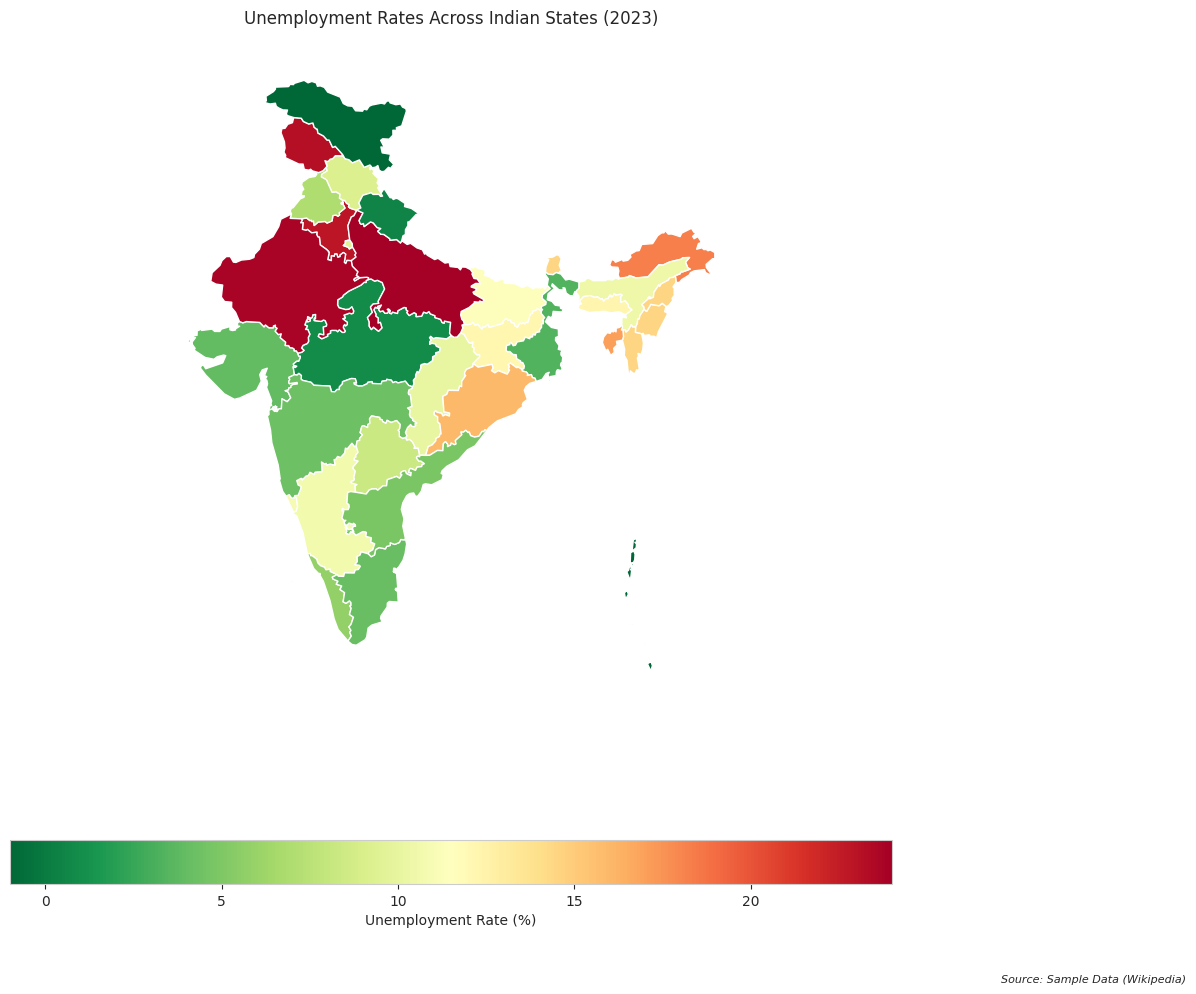

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with a color gradient
map_df.plot(
    column='Unemployment_Rate',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Unemployment Rate (%)',
        'orientation': 'horizontal',
        'shrink': 0.6
    },
    missing_kwds={'color': 'lightgrey'},
    cmap='RdYlGn_r'  # Red-Yellow-Green color scheme (reversed)
)

# Customize the map
plt.title('Unemployment Rates Across Indian States (2023)', pad=20)
plt.axis('off')  # Hide axes

# Add source information
plt.figtext(
    0.99, 0.01,
    'Source: Sample Data (Wikipedia)',
    ha='right',
    va='bottom',
    fontsize=8,
    style='italic'
)

# Show the map
plt.tight_layout()
plt.show()

### Bar Chart

<ipython-input-54-4fb8ed56031d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




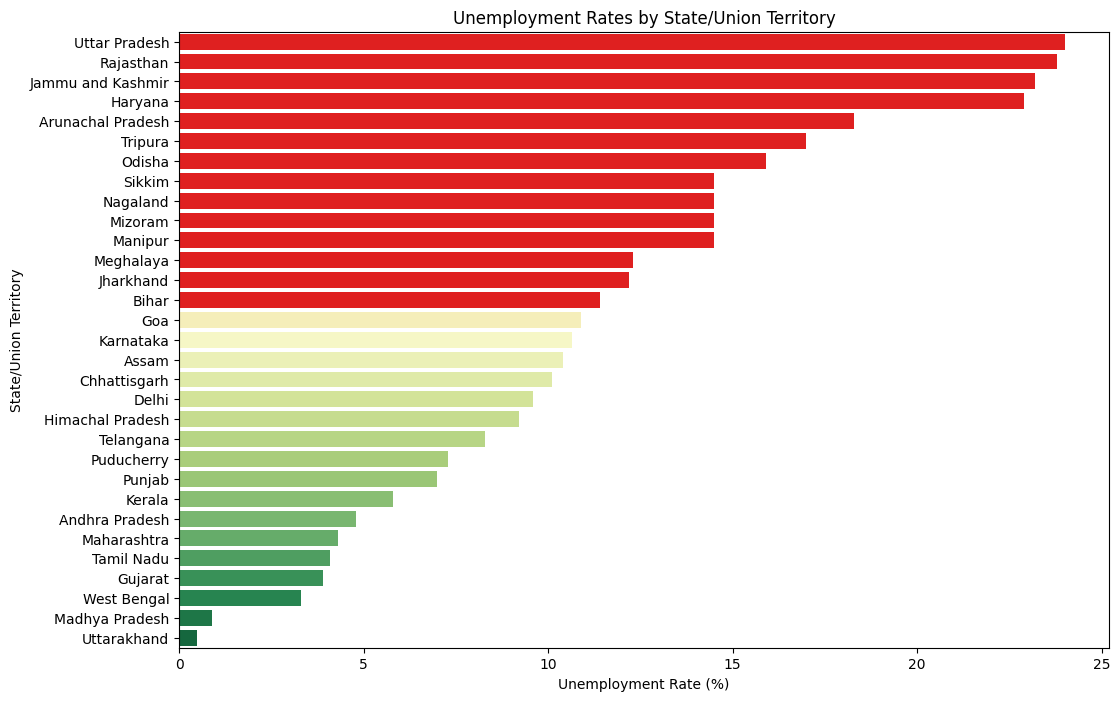

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = merged_df.sort_values('Unemployment_Rate (%)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Unemployment_Rate (%)', y='State/Union Territory', data=df_sorted, palette='RdYlGn')

national_avg = merged_df['Unemployment_Rate (%)'].mean()
highlighted = df_sorted[df_sorted['Unemployment_Rate (%)'] > national_avg]

sns.barplot(x='Unemployment_Rate (%)', y='State/Union Territory', data=highlighted, color='red')

plt.title('Unemployment Rates by State/Union Territory')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State/Union Territory')
plt.show()


In [ ]:
import plotly.express as px

# Sort the dataframe by unemployment rate
df_sorted = merged_df.sort_values('Unemployment_Rate (%)', ascending=False)

# Find the national average (if needed)
national_avg = merged_df['Unemployment_Rate (%)'].mean()
print(national_avg)
# Plot Bar Chart with Gradiented Color Scale
fig = px.bar(df_sorted,
             x='State/Union Territory',
             y='Unemployment_Rate (%)',
             color='Unemployment_Rate (%)',
             color_continuous_scale='RdYlGn',  # Red to Green scale for color gradient
             labels={'Unemployment_Rate (%)': 'Unemployment Rate (%)'},
             title='Unemployment Rates by State/Union Territory')

fig.update_layout(xaxis_title="State/Union Territory",
                  yaxis_title="Unemployment Rate (%)",
                  xaxis_tickangle=-45,
                  coloraxis_colorbar=dict(title='Unemployment Rate (%)'))  # Add color scale legend

fig.show()


11.291935483870969


### Regional Analysis

In [ ]:
import plotly.express as px

# Calculate average unemployment rate by region
region_avg = merged_df.groupby('Region')['Unemployment_Rate (%)'].mean().reset_index()

# Plot Regional Analysis
fig = px.bar(region_avg,
             x='Region',
             y='Unemployment_Rate (%)',
             color='Region',
             title='Average Unemployment Rate by Region')

fig.update_layout(xaxis_title="Region", yaxis_title="Average Unemployment Rate (%)")
fig.show()


### Trend Analysis

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_unemployment_rate"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
#print(soup)
table = soup.find_all('table', {'class': 'wikitable'})
print(table)


[<table class="wikitable sortable">
<caption><small>(As of September 2022)</small>
</caption>
<tbody><tr>
<th>State or union territory<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup>
</th>
<th>Unemployment rate (%)
</th></tr>
<tr>
<td><a href="/wiki/Andhra_Pradesh" title="Andhra Pradesh">Andhra Pradesh</a>
</td>
<td>4.8
</td></tr>
<tr>
<td><a href="/wiki/Arunachal_Pradesh" title="Arunachal Pradesh">Arunachal Pradesh</a>
</td>
<td>18.3
</td></tr>
<tr>
<td><a href="/wiki/Assam" title="Assam">Assam</a>
</td>
<td>10..4
</td></tr>
<tr>
<td><a href="/wiki/Bihar" title="Bihar">Bihar</a>
</td>
<td>11.4
</td></tr>
<tr>
<td><a href="/wiki/Chhattisgarh" title="Chhattisgarh">Chhattisgarh</a>
</td>
<td>10.1
</td></tr>
<tr>
<td><a href="/wiki/Delhi" title="Delhi">Delhi</a>
</td>
<td>9.6
</td></tr>
<tr>
<td><a href="/wiki/Goa" title="Goa">Goa</a>
</td>
<td>10.9
</td></tr>
<tr>
<td><a href="/wiki/Gujarat" ti

In [ ]:
df_urban_rural = pd.read_html(str(table))[1]
df_urban_rural

<ipython-input-65-6209122da65d>:1: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,Month[3],India,Urban,Rural
0,Feb 2023,7.45,7.93,7.23
1,Jan 2023,7.14,8.55,6.48
2,Dec 2022,8.30,8.96,7.61
3,Nov 2022,8.00,8.96,7.61
4,Oct 2022,7.92,7.34,8.19
5,Sept 2022,6.43,7.70,5.84
6,Aug 2022,8.28,9.57,7.68
7,July 2022,6.83,8.22,6.17
8,June 2022,7.83,7.32,8.07
9,May 2022,7.14,8.24,6.63


In [ ]:
fig = px.line(df_urban_rural, x='Month[3]', y=['India', 'Urban', 'Rural'],
              title='Unemployment Rate Trends (Urban, Rural, and India)',
              labels={'value': 'Unemployment Rate (%)', 'variable': 'Category'},
              markers=True)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

### Infographics